In [9]:
import numpy as np
import cv2

In [2]:
from PIL import Image

In [3]:
train = Image.open("model-train-under-shutterstock-license.jpg")

In [10]:
train_array = np.array(train)

In [12]:
lenna = cv2.imread("lenna.png")

In [18]:
def cv2_to_pil(image:np.array):
    return Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

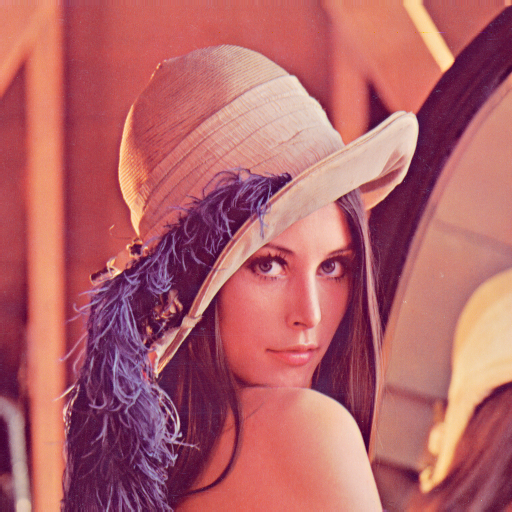

In [21]:
lenna_pil = cv2_to_pil(lenna)
lenna_pil

In [24]:
lenna.shape

(512, 512, 3)

In [30]:
bbox = int(lenna.shape[0]/4), int(3*lenna.shape[0]/4)

In [31]:
bbox

(128, 384)

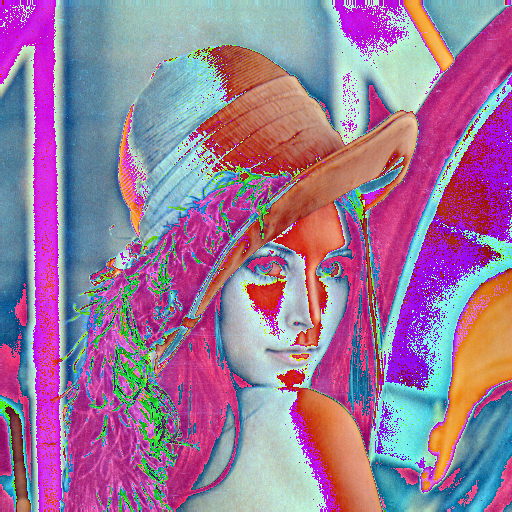

In [36]:
cv2_to_pil(lenna.in)

In [33]:
lenna_inv = lenna.copy()

In [42]:
lenna_inv[bbox[0]:bbox[1], bbox[0]:bbox[1]] = lenna[bbox[0]:bbox[1], bbox[0]:bbox[1]] + 128

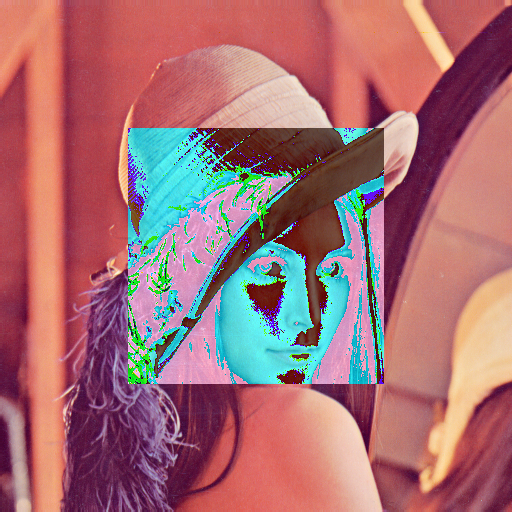

In [43]:
cv2_to_pil(lenna_inv)

In [57]:
lenna[0, 0], 255 - lenna[0, 0]

(array([125, 137, 226], dtype=uint8), array([130, 118,  29], dtype=uint8))

In [54]:
lenna_inv[bbox[0]:bbox[1], bbox[0]:bbox[1]] = 255 - lenna[bbox[0]:bbox[1], bbox[0]:bbox[1]]

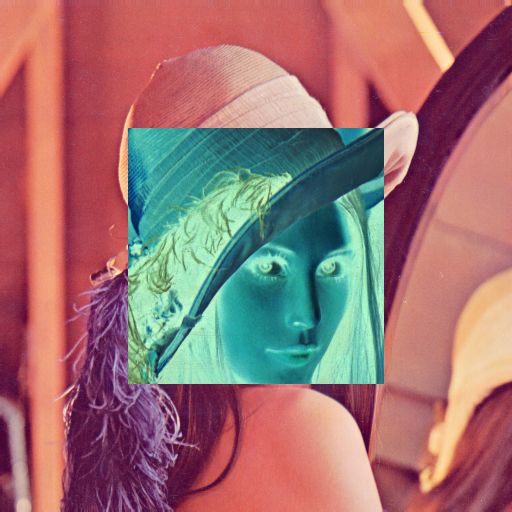

In [55]:
cv2_to_pil(lenna_inv)

In [104]:
saturation = value = np.ones((300, 4 * 300), np.uint8) * 255

In [105]:
saturation

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]],
      shape=(300, 1200), dtype=uint8)

In [106]:
saturation.shape[1]/180

6.666666666666667

In [119]:
hue_array = np.floor(np.arange(0, 180, 1/(saturation.shape[1]/180))).astype(np.uint8)

In [120]:
hue_matrix = np.tile(hue_array, (saturation.shape[0], 1))  #, axis = 1)

In [121]:
hue_matrix

array([[  0,   0,   0, ..., 179, 179, 179],
       [  0,   0,   0, ..., 179, 179, 179],
       [  0,   0,   0, ..., 179, 179, 179],
       ...,
       [  0,   0,   0, ..., 179, 179, 179],
       [  0,   0,   0, ..., 179, 179, 179],
       [  0,   0,   0, ..., 179, 179, 179]],
      shape=(300, 1200), dtype=uint8)

In [122]:
gay_stripe = np.stack([hue_matrix, saturation, value], axis = 2)  #, dtype=np.uint8)

In [135]:
gay_stripe[:, :, 0]

array([[  0,   0,   0, ..., 179, 179, 179],
       [  0,   0,   0, ..., 179, 179, 179],
       [  0,   0,   0, ..., 179, 179, 179],
       ...,
       [  0,   0,   0, ..., 179, 179, 179],
       [  0,   0,   0, ..., 179, 179, 179],
       [  0,   0,   0, ..., 179, 179, 179]],
      shape=(300, 1200), dtype=uint8)

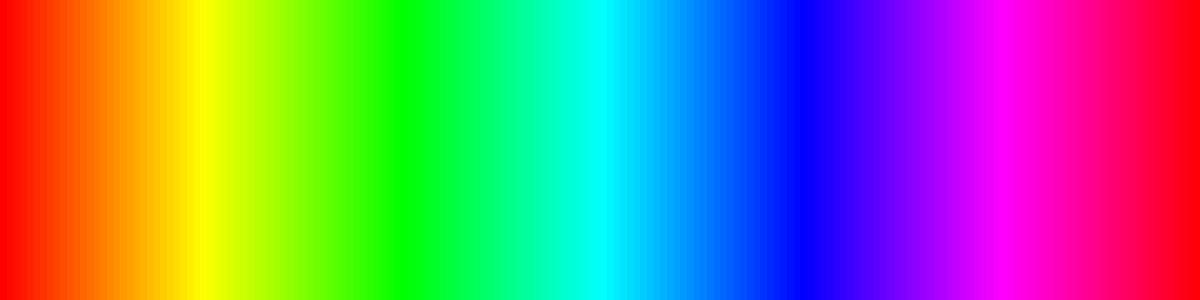

In [144]:
cv2_to_pil(cv2.cvtColor(gay_stripe, cv2.COLOR_HSV2BGR))

In [188]:
legos = cv2.cvtColor(cv2.imread("legos.jpg"), cv2.COLOR_BGR2HSV)

In [228]:
legos_cvt = legos.copy()

In [229]:
value_difs = 255 - legos_cvt[:, :, 2] 

In [230]:
legos_cvt[:, :, 1] = legos_cvt[:, :, 1].clip(200, 255)

In [231]:
legos_cvt[:, :, 2] = legos_cvt[:, :, 2].clip(128, 255)

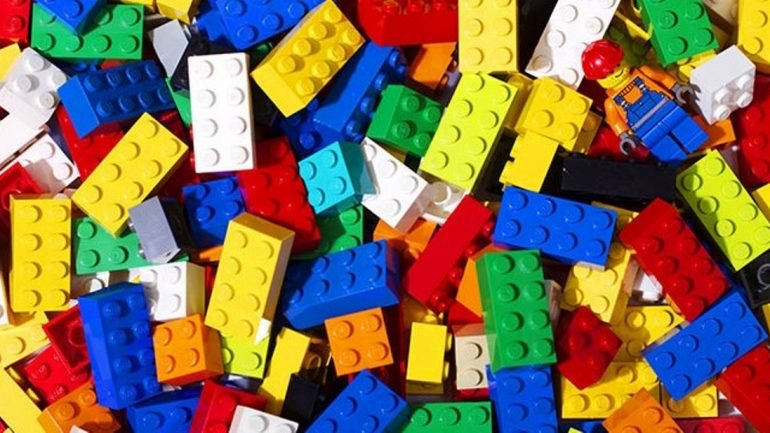

In [232]:
Image.fromarray(cv2.cvtColor(legos, cv2.COLOR_HSV2RGB))

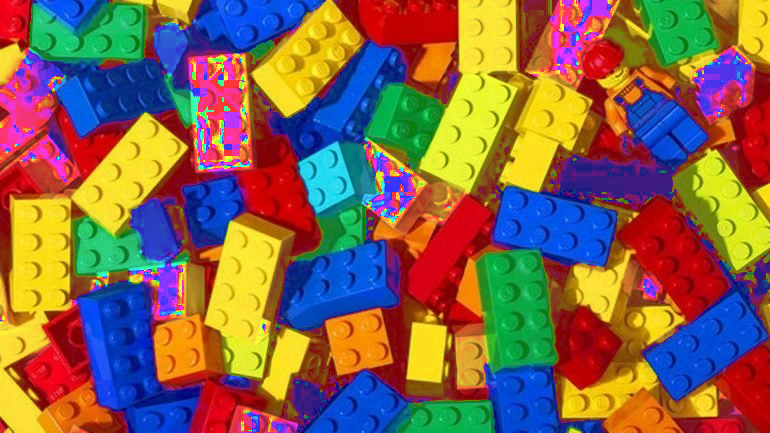

In [233]:
Image.fromarray(cv2.cvtColor(legos_cvt, cv2.COLOR_HSV2RGB))

In [148]:
colors = ["red", "orange", "yellow", "green", "cyan", "blue", "white", "black"]

In [324]:
colors_dict = dict()
colors_dict["red"] = (170, 8)
colors_dict["orange"] = (14, 19)
colors_dict["burnt_yellow"] = (22, 27)
colors_dict["yellow"] = (30, 35)
colors_dict["green"] = (45, 75)
colors_dict["cyan"] = (85, 95)
colors_dict["blue"] = (105, 130)


In [325]:
image_list = []
for color, (gt, lt) in colors_dict.items():
    current_image = legos.copy()
    if color == "red":
        current_image[~(((current_image[:, :, 0] >= gt) | (current_image[:, :, 0] <= lt)) & (current_image[:, :, 1] >= 128) & (current_image[:, :, 2] >= 56))] = 0
    else:
        current_image[~((current_image[:, :, 0] >= gt) & (current_image[:, :, 0] <= lt) & (current_image[:, :, 1] >= 128) & (current_image[:, :, 2] >= 56))] = 0
    image_list.append(current_image)

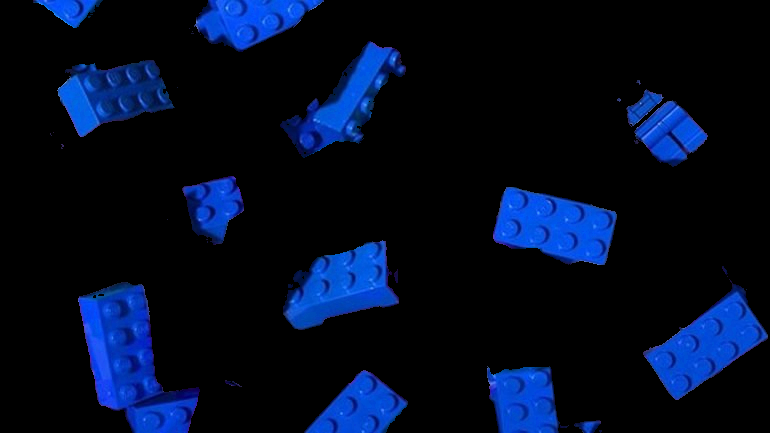

In [332]:
Image.fromarray(cv2.cvtColor(image_list[6], cv2.COLOR_HSV2RGB))

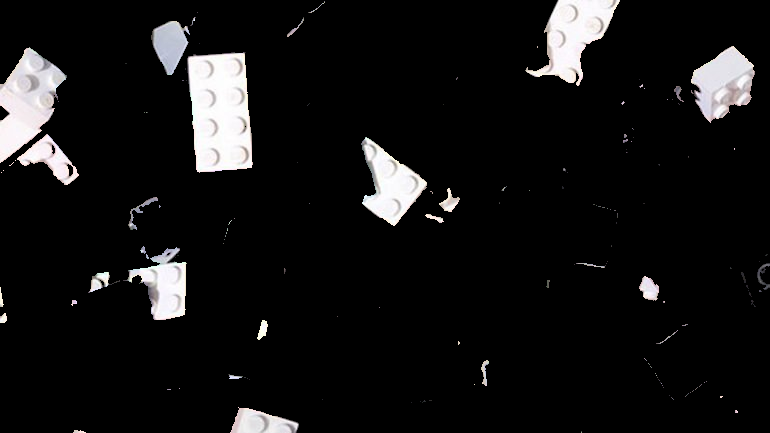

In [340]:
white_image = legos.copy()
white_image[~((white_image[:, :, 1] <= 40) & (white_image[:, :, 2] >= 40))] = 0
Image.fromarray(cv2.cvtColor(white_image, cv2.COLOR_HSV2RGB))

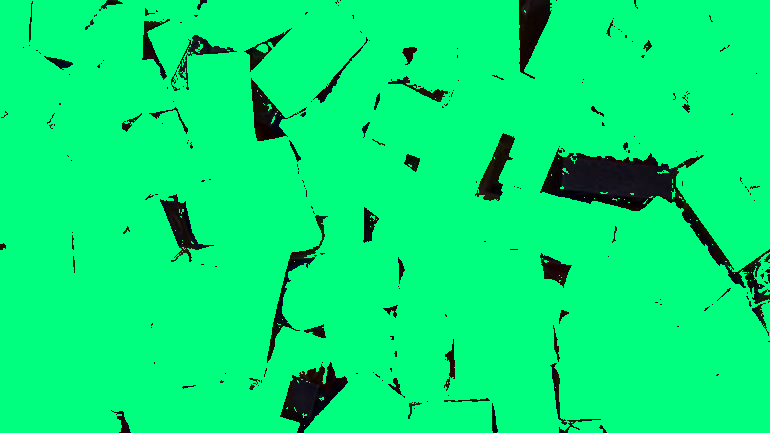

In [345]:
black_image = legos.copy()
black_image[~((black_image[:, :, 1] >= 40) & (black_image[:, :, 2] <= 40))] = 255
Image.fromarray(cv2.cvtColor(black_image, cv2.COLOR_HSV2RGB))

In [244]:
legos_cvt[(legos[:, :, 0] >= 170) | (legos[:, :, 0] <= 10)] = 0

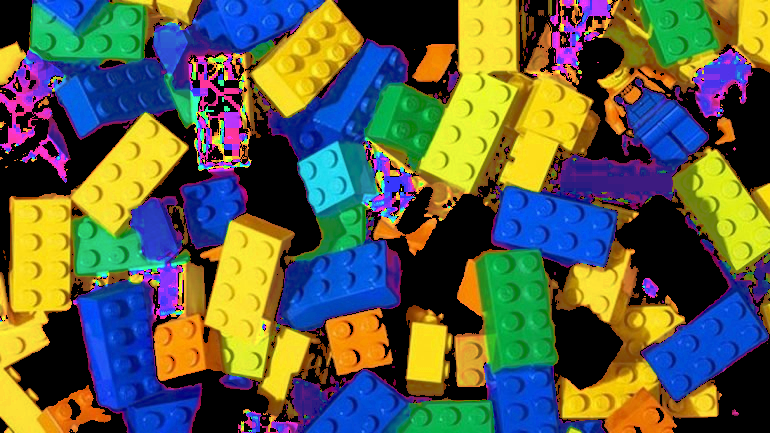

In [245]:
Image.fromarray(cv2.cvtColor(legos_cvt, cv2.COLOR_HSV2RGB))